In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("/content/kc_house_price_data.csv")

In [69]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [70]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [71]:
#Floors should be an integer by definition.
df['floors'] = df['floors'].astype(int)
df['floors'].head()

0    1
1    2
2    1
3    1
4    1
Name: floors, dtype: int64

In [72]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [73]:
#Bathrooms should be an integer. For the purpose of this project full and half-bathrooms will be unitary.
#For this I am assuming that any fraction entered above the unit is another bathroom, i.e. 2.25 = 3 bathrooms.
import math
df['bathrooms'] = df['bathrooms'].apply(lambda x: math.ceil(x)).astype(int)
df.bathrooms.head()

0    1
1    3
2    1
3    3
4    2
Name: bathrooms, dtype: int64

In [74]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.440478,2080.321850,1.509941e+04,1.445988,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.922309,918.106125,4.141264e+04,0.551658,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,3.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,3.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [75]:
from datetime import datetime
# Convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract date component and create a new column
df['date_only'] = df['date'].dt.date

# Drop the original datetime column
df = df.drop('date', axis=1)

# Print the updated data frame
print(df.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3          1         1180      5650       1   
1  6414100192  538000.0         3          3         2570      7242       2   
2  5631500400  180000.0         2          1          770     10000       1   
3  2487200875  604000.0         4          3         1960      5000       1   
4  1954400510  510000.0         3          2         1680      8080       1   

   waterfront  view  condition  ...  sqft_above  sqft_basement yr_built  \
0         NaN   0.0          3  ...        1180            0.0     1955   
1         0.0   0.0          3  ...        2170          400.0     1951   
2         0.0   0.0          3  ...         770            0.0     1933   
3         0.0   0.0          5  ...        1050          910.0     1965   
4         0.0   0.0          3  ...        1680            0.0     1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [77]:
df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_only           0
dtype: int64

In [78]:
#This gives an error, so propbably I should explore the data contained first to find the error value: '?'.
#I will first check the values in the series.
print('Missing Values: ', df.sqft_basement.isna().sum())
df.sqft_basement.value_counts()[:10]

Missing Values:  0


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
Name: sqft_basement, dtype: int64

In [79]:
#Replace '?' with a value of 0 and define the correct category as integer.
df['sqft_basement'] = df['sqft_basement'].replace('?',0).astype(float).astype(int)
print(df['sqft_basement'].dtype)

int64


In [80]:
(df.yr_renovated.value_counts(normalize = True)* 100).head()

0.0       95.809631
2014.0     0.411152
2013.0     0.174599
2003.0     0.174599
2007.0     0.168966
Name: yr_renovated, dtype: float64

correlation between yr_renovated and price is 0.12959927590639217


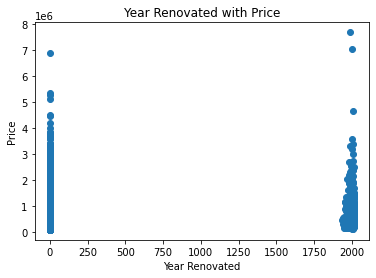

In [81]:
print("correlation between yr_renovated and price is {}".format(df['yr_renovated'].corr(df['price'])))
plt.scatter(x = df.yr_renovated ,y = df.price)
plt.title("Year Renovated with Price")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

In [82]:
df = df.drop('yr_renovated', axis=1)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

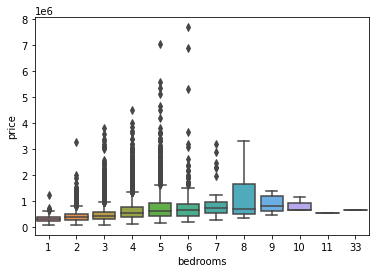

In [83]:
sns.boxplot(x ='bedrooms' , y='price' , data =df )

<AxesSubplot:>

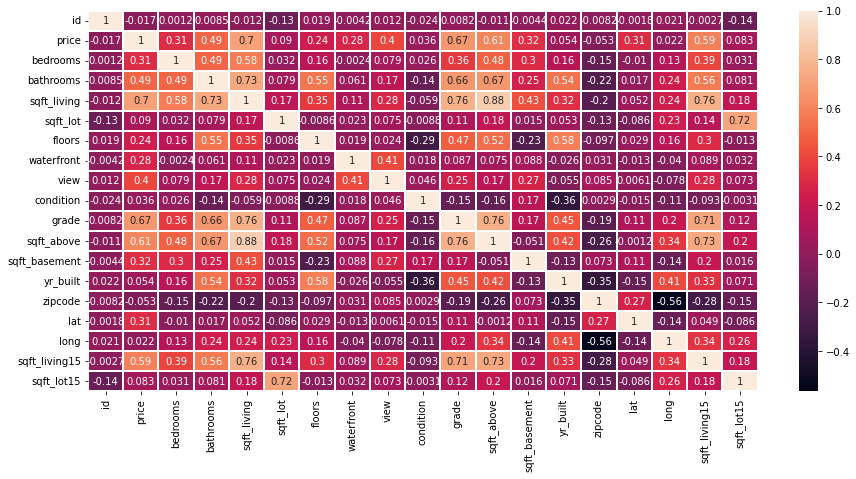

In [84]:
plt.figure(figsize =(15,7))
sns.heatmap(df.corr() , annot =True , linewidth =0.2)

As expected there are some multicollinearity issues which we need to address.

We note that sqft_above and sqft_living are highly positively correlated, which is expected as sqft_above is the square footage of the house apart from basement (and we saw earlier that most houses did not have a basement). We will choose to keep sqft_living as it encompasses more information and drop the sqt_above feature. We also see that sqft_living15 is moderately highly correlated with sqft_living and so we will drop this feature too.

We also note that sqft_lot and sqft_lot15 are highly positively correlated and we will choose to keep sqft_lot as it relates directly to the house as opposed to its neighbours (and so potentially easier to obtain data for and generalise.)

In [85]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'date_only'], axis = 1)
    return df

In [86]:
df = drop_corrfeats(df)

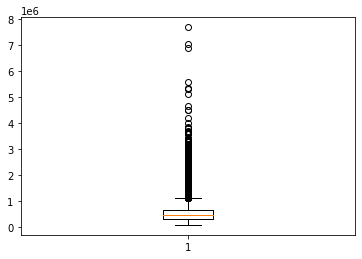

In [87]:
plt.boxplot(df.price)
plt.show()

Text(0.5, 1.0, 'price vs sqfeet')

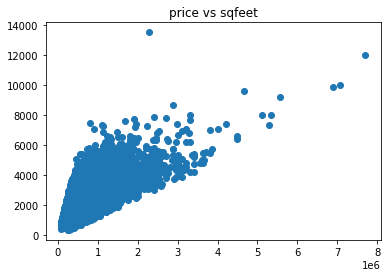

In [88]:
plt.scatter(df.price,df.sqft_living)
plt.title("price vs sqfeet")

Text(0.5, 1.0, 'price vs long')

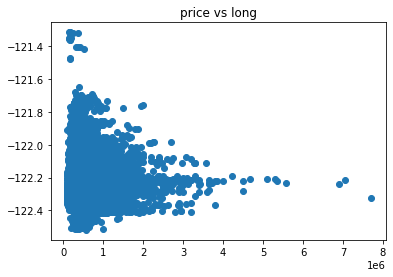

In [89]:
plt.scatter(df.price,df.long)
plt.title("price vs long")

Text(0.5, 1.0, 'price vs lat')

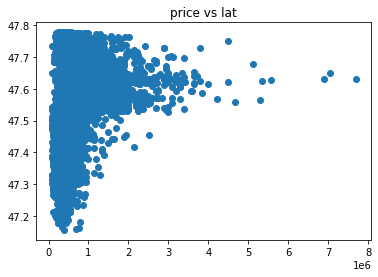

In [90]:
plt.scatter(df.price,df.lat)
plt.title("price vs lat")

In [91]:
df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
dtype: int64

In [92]:
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mean())

In [93]:
df['view'] = df['view'].fillna(df['view'].mean())

In [94]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [96]:
df.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

In [97]:
df_iqr=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long']
df_iqr

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [98]:
 def tukey(data):
    q1  , q3 = np.percentile(data, [25 ,75])
    
    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)
    
    return np.where((data > upper) | (data < lower))

In [99]:
noise_index =  tukey(df[df_iqr])

In [100]:
# df.drop(noise_index,inplace=True)


In [101]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1,1180,5650,1,0.007596,0.0,3,7,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,3,2570,7242,2,0.000000,0.0,3,7,400,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1,770,10000,1,0.000000,0.0,3,6,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3,1960,5000,1,0.000000,0.0,5,7,910,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2,1680,8080,1,0.000000,0.0,3,8,0,1987,98074,47.6168,-122.045


In [102]:
def minmax_scale(data):
    """
    Applies Min-Max scaling to the given dataset.
    
    Args:
        data: A numpy array containing the data to be scaled.
        
    Returns:
        A numpy array containing the scaled data.
    """
    # Compute the minimum and maximum values of each feature
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    
    # Apply the scaling formula to each feature
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    
    return scaled_data


In [103]:
df.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

In [104]:
df_scale=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long']
# df[df_scale].head()

In [105]:
minmax_scale(df[df_scale])

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long
0,0.06250,0.000000,0.061503,0.003108,0.0,0.007596,0.0,0.5,0.4,0.000000,0.478261,0.893939,0.571498,0.217608
1,0.06250,0.285714,0.167046,0.004072,0.5,0.000000,0.0,0.5,0.4,0.082988,0.443478,0.626263,0.908959,0.166113
2,0.03125,0.000000,0.030372,0.005743,0.0,0.000000,0.0,0.5,0.3,0.000000,0.286957,0.136364,0.936143,0.237542
3,0.09375,0.285714,0.120729,0.002714,0.0,0.000000,0.0,1.0,0.4,0.188797,0.565217,0.681818,0.586939,0.104651
4,0.06250,0.142857,0.099468,0.004579,0.0,0.000000,0.0,0.5,0.5,0.000000,0.756522,0.368687,0.741354,0.393688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.06250,0.285714,0.088079,0.000370,1.0,0.000000,0.0,0.5,0.5,0.000000,0.947826,0.515152,0.874055,0.143688
21593,0.09375,0.285714,0.147304,0.003206,0.5,0.000000,0.0,0.5,0.5,0.000000,0.991304,0.732323,0.570693,0.130399
21594,0.03125,0.000000,0.049355,0.000503,0.5,0.000000,0.0,0.5,0.4,0.000000,0.947826,0.722222,0.705324,0.182724
21595,0.06250,0.285714,0.093394,0.001132,0.5,0.007596,0.0,0.5,0.5,0.000000,0.904348,0.131313,0.608975,0.373754


In [106]:
data=pd.concat([df.drop(df[df_scale],axis=1),minmax_scale(df[df_scale])],axis=1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,221900.0,0.06250,0.000000,0.061503,0.003108,0.0,0.007596,0.0,0.5,0.4,0.000000,0.478261,0.893939,0.571498,0.217608
1,6414100192,538000.0,0.06250,0.285714,0.167046,0.004072,0.5,0.000000,0.0,0.5,0.4,0.082988,0.443478,0.626263,0.908959,0.166113
2,5631500400,180000.0,0.03125,0.000000,0.030372,0.005743,0.0,0.000000,0.0,0.5,0.3,0.000000,0.286957,0.136364,0.936143,0.237542
3,2487200875,604000.0,0.09375,0.285714,0.120729,0.002714,0.0,0.000000,0.0,1.0,0.4,0.188797,0.565217,0.681818,0.586939,0.104651
4,1954400510,510000.0,0.06250,0.142857,0.099468,0.004579,0.0,0.000000,0.0,0.5,0.5,0.000000,0.756522,0.368687,0.741354,0.393688


In [107]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,221900.0,0.06250,0.000000,0.061503,0.003108,0.0,0.007596,0.0,0.5,0.4,0.000000,0.478261,0.893939,0.571498,0.217608
1,6414100192,538000.0,0.06250,0.285714,0.167046,0.004072,0.5,0.000000,0.0,0.5,0.4,0.082988,0.443478,0.626263,0.908959,0.166113
2,5631500400,180000.0,0.03125,0.000000,0.030372,0.005743,0.0,0.000000,0.0,0.5,0.3,0.000000,0.286957,0.136364,0.936143,0.237542
3,2487200875,604000.0,0.09375,0.285714,0.120729,0.002714,0.0,0.000000,0.0,1.0,0.4,0.188797,0.565217,0.681818,0.586939,0.104651
4,1954400510,510000.0,0.06250,0.142857,0.099468,0.004579,0.0,0.000000,0.0,0.5,0.5,0.000000,0.756522,0.368687,0.741354,0.393688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,0.06250,0.285714,0.088079,0.000370,1.0,0.000000,0.0,0.5,0.5,0.000000,0.947826,0.515152,0.874055,0.143688
21593,6600060120,400000.0,0.09375,0.285714,0.147304,0.003206,0.5,0.000000,0.0,0.5,0.5,0.000000,0.991304,0.732323,0.570693,0.130399
21594,1523300141,402101.0,0.03125,0.000000,0.049355,0.000503,0.5,0.000000,0.0,0.5,0.4,0.000000,0.947826,0.722222,0.705324,0.182724
21595,291310100,400000.0,0.06250,0.285714,0.093394,0.001132,0.5,0.007596,0.0,0.5,0.5,0.000000,0.904348,0.131313,0.608975,0.373754


In [108]:
data = data.drop("id", axis=1)

In [109]:
data = data.drop("zipcode", axis=1)

In [110]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,long
0,221900.0,0.06250,0.000000,0.061503,0.003108,0.0,0.007596,0.0,0.5,0.4,0.000000,0.478261,0.571498,0.217608
1,538000.0,0.06250,0.285714,0.167046,0.004072,0.5,0.000000,0.0,0.5,0.4,0.082988,0.443478,0.908959,0.166113
2,180000.0,0.03125,0.000000,0.030372,0.005743,0.0,0.000000,0.0,0.5,0.3,0.000000,0.286957,0.936143,0.237542
3,604000.0,0.09375,0.285714,0.120729,0.002714,0.0,0.000000,0.0,1.0,0.4,0.188797,0.565217,0.586939,0.104651
4,510000.0,0.06250,0.142857,0.099468,0.004579,0.0,0.000000,0.0,0.5,0.5,0.000000,0.756522,0.741354,0.393688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0.06250,0.285714,0.088079,0.000370,1.0,0.000000,0.0,0.5,0.5,0.000000,0.947826,0.874055,0.143688
21593,400000.0,0.09375,0.285714,0.147304,0.003206,0.5,0.000000,0.0,0.5,0.5,0.000000,0.991304,0.570693,0.130399
21594,402101.0,0.03125,0.000000,0.049355,0.000503,0.5,0.000000,0.0,0.5,0.4,0.000000,0.947826,0.705324,0.182724
21595,400000.0,0.06250,0.285714,0.093394,0.001132,0.5,0.007596,0.0,0.5,0.5,0.000000,0.904348,0.608975,0.373754


In [112]:
# Split the dataset into training and testing sets
train_data, test_data = np.split(data.sample(frac=1, random_state=42), [int(0.8 * len(df))])

# Define the input features and target variable
X_train = train_data.drop([ "price"], axis=1)
y_train = train_data["price"]
X_test = test_data.drop([ "price"], axis=1)
y_test = test_data["price"]

# Define a function to calculate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define a function to split the data based on a given feature and threshold value
def split_data(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    X_left, y_left = X.loc[left_mask], y.loc[left_mask]
    X_right, y_right = X.loc[right_mask], y.loc[right_mask]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split point for a given feature
def find_best_split(X, y, feature):
    # Sort the data by the feature
    X_sorted = X.sort_values(feature)
    y_sorted = y[X_sorted.index]
    # Initialize the best split point and lowest mse
    best_split = None
    lowest_mse = float("inf")
    # Loop through each unique value of the feature
    for threshold in X_sorted[feature].unique():
        # Split the data at the current threshold
        X_left, y_left, X_right, y_right = split_data(X_sorted, y_sorted, feature, threshold)
        # Calculate the mse for the current split
        mse = mean_squared_error(y_left, y_left.mean()) + mean_squared_error(y_right, y_right.mean())
        # Update the best split and lowest mse if the current mse is lower
        if mse < lowest_mse:
            best_split = (feature, threshold)
            lowest_mse = mse
    return best_split, lowest_mse


In [113]:
# Define a class for decision tree nodes
class Node:
    def __init__(self, X, y, depth=0, max_depth=5, min_samples_split=2):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_threshold = None
        self.prediction = y.mean()
        # Stop splitting if the node reaches the maximum depth or minimum number of samples
        if depth < max_depth and len(X) >= min_samples_split:
            # Find the best split point among all features
            best_split, lowest_mse = min([find_best_split(X, y, feature) for feature in X.columns], key=lambda x: x[1])
            # Create left and right child nodes and continue splitting recursively
            if best_split is not None:
                self.split_feature, self.split_threshold = best_split
                X_left, y_left, X_right, y_right = split_data(X, y, self.split_feature, self.split_threshold)
                self.left = Node(X_left, y_left, depth+1, max_depth, min_samples_split)
                self.right = Node(X_right, y_right, depth+1, max_depth, min_samples_split)
                self.prediction = None

    def predict_row(self, row):
        # Recursively traverse the tree to find the prediction for a given row
        if self.prediction is not None:
            return self.prediction
        elif row[self.split_feature] <= self.split_threshold:
            return self.left.predict_row(row)
        else:
            return self.right.predict_row(row)

    def predict(self, X):
        # Make predictions for all rows in X
        return np.array([self.predict_row(X.iloc[i]) for i in range(len(X))])

# Train the decision tree on the training data
tree = Node(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 118250506514.62561


In [114]:
y_pred

array([539884.56021306, 539884.56021306, 539884.56021306, ...,
       539884.56021306, 539884.56021306, 539884.56021306])

In [115]:
pred_df = pd.DataFrame({'predprice':y_pred})

In [116]:
pred_df.head()

,predprice
0,539884.560213
1,539884.560213
2,539884.560213
3,539884.560213
4,539884.560213


In [119]:
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [539884.56021306 539884.56021306 539884.56021306 ... 539884.56021306
 539884.56021306 539884.56021306]
Actual values: [260000. 850000. 407193. ... 299800. 245000. 545000.]
